In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
start = '2014-01-01'
end = '2024-12-21'
stock = 'NVDA'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
data.reset_index(inplace=True)

In [8]:
data


Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
0,2014-01-02,0.373966,0.376796,0.370665,0.375381,260092000
1,2014-01-03,0.369486,0.375381,0.368307,0.374674,259332000
2,2014-01-06,0.374438,0.377267,0.369722,0.373259,409492000
3,2014-01-07,0.380568,0.381983,0.375617,0.378210,333288000
4,2014-01-08,0.385756,0.387642,0.380568,0.381983,308192000
...,...,...,...,...,...,...
2757,2024-12-16,132.000000,134.399994,130.419998,134.179993,237951100
2758,2024-12-17,130.389999,131.589996,126.860001,129.089996,259410300
2759,2024-12-18,128.910004,136.699997,128.279999,133.860001,277444500


In [9]:
ma_100_days = data.Close.rolling(100).mean()

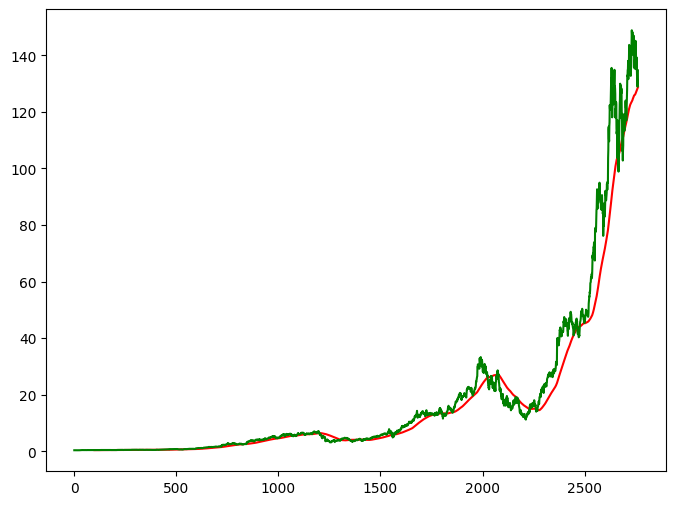

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
ma_200_days = data.Close.rolling(200).mean()

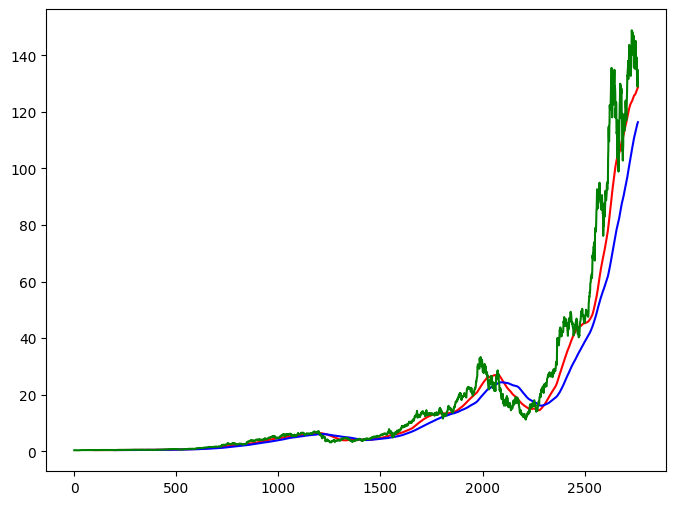

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [13]:
data.dropna(inplace=True)

In [14]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [15]:
data_train.shape[0]

2209

In [16]:
data_test.shape[0]

553

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_train_scale = scaler.fit_transform(data_train)


In [19]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [20]:
x, y = np.array(x), np.array(y)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\Satya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - loss: 0.0301
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 245ms/step - loss: 0.0052
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 318ms/step - loss: 0.0049
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 336ms/step - loss: 0.0055
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 322ms/step - loss: 0.0033
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 324ms/step - loss: 0.0037
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 323ms/step - loss: 0.0028
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 327ms/step - loss: 0.0029
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 324ms/step - loss: 0.0030
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 330ms/step - loss: 0.0032
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 311ms/step - loss: 0.0030
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 334ms/step - loss: 0.0033
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - loss: 0.0027
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 315ms/step - loss: 0.0025
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [26]:
pas_100_days = data_train.tail(100)

In [27]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [28]:
data_test_scale  =  scaler.fit_transform(data_test)

In [29]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [30]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step


In [31]:
scale =1/scaler.scale_

In [32]:
y_predict = y_predict*scale

In [33]:
y = y*scale

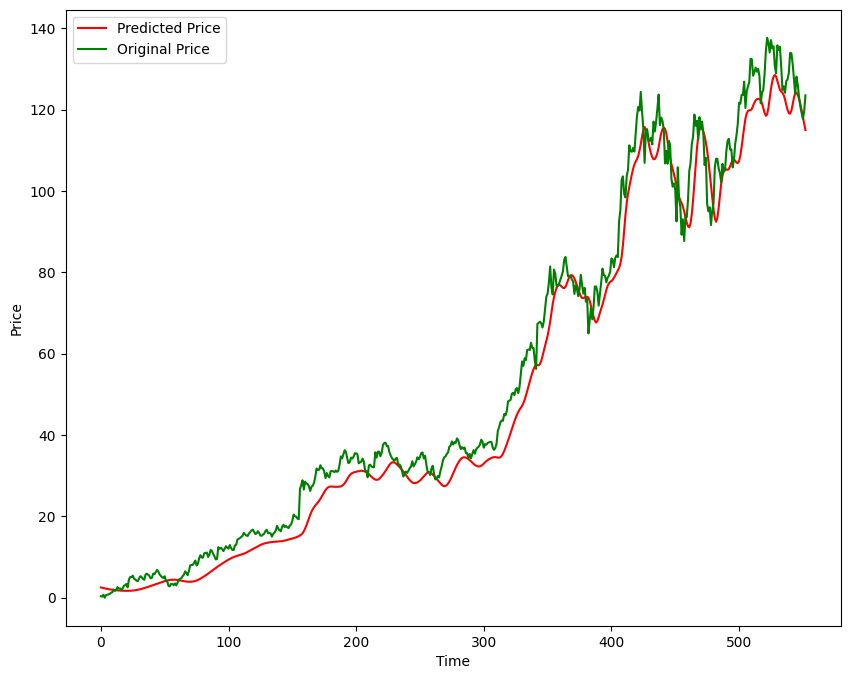

In [34]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
model.save('Stock Predictions Model.keras')